# Utility and Probability

In [1]:
import pandas as pd

In [49]:
data_2022 = pd.read_csv("Game_data/2022_LoL_esports_match_data_from_OraclesElixir_20221016.csv")

/Users/alexandreberkovic/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [50]:
counts = data_2022.groupby(['playerid', 'champion']).count()['gameid']

/var/folders/34/kt2mvxyx0lx0f3th233kk1200000gn/T/ipykernel_17683/1754827642.py:6: RuntimeWarning: divide by zero encountered in log
  df = pd.DataFrame([np.log(i) for i in games_played])


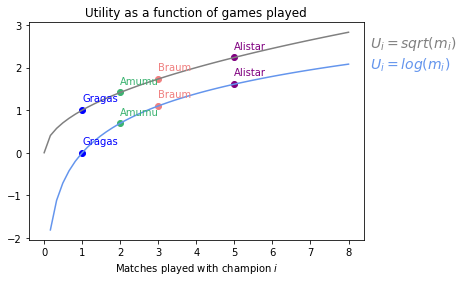

In [51]:
import numpy as np
import matplotlib.pyplot as plt

games_played = np.linspace(0, 8, num=50)

df = pd.DataFrame([np.log(i) for i in games_played])

df.columns = [r"$U_i = log(m_i)$"]

df.index = games_played

fig, ax = plt.subplots()

plt.plot(df.index, df[r"$U_i = log(m_i)$"], color = 'cornflowerblue')

for line, name in zip(ax.lines, df.columns):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=14, va="center")

ax.set_title("Utility as a function of games played")
ax.set_xlabel(r"Matches played with champion $i$")

colors = ['purple', 'mediumseagreen', 'lightcoral', 'blue']
for i in range(4):
    plt.scatter(x = counts.iloc[i], y = np.log(counts.iloc[i]), marker='o', color = colors[i])
    ax.text(counts.iloc[i], np.log(counts.iloc[i]) + 0.2, counts.index[i][1], color = colors[i])


df = pd.DataFrame([np.sqrt(i) for i in games_played])

df.columns = [r"$U_i = sqrt(m_i)$"]

df.index = games_played

plt.plot(df.index, df[r"$U_i = sqrt(m_i)$"], color = 'grey')

for line, name in zip(ax.lines, df.columns):
    y = line.get_ydata()[-1]+0.5
    ax.annotate(name, xy=(1,y), xytext=(6,0), color='grey', 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=14, va="center")

ax.set_title("Utility as a function of games played")
ax.set_xlabel(r"Matches played with champion $i$")

colors = ['purple', 'mediumseagreen', 'lightcoral', 'blue']
for i in range(4):
    plt.scatter(x = counts.iloc[i], y = np.sqrt(counts.iloc[i]), marker='o', color = colors[i])
    ax.text(counts.iloc[i], np.sqrt(counts.iloc[i]) + 0.2, counts.index[i][1], color = colors[i])

In [52]:
player_position_champion_matrix = pd.crosstab(data_2022['teamid'], [data_2022['position'], data_2022['champion']])

# Utility

In [53]:
utility_matrix = np.sqrt(player_position_champion_matrix)

In [54]:
I, J, T = len(data_2022['champion'].unique()), len(data_2022['position'].unique()), 20

In [55]:
utility_matrix = utility_matrix.reset_index()

In [56]:
blue_team = data_2022['teamid'].unique()[0]
blue_df = data_2022[data_2022['teamid'] == blue_team]
blue_mat = pd.crosstab(blue_df['position'], blue_df['champion'])

red_team = data_2022['teamid'].unique()[1]
red_df = data_2022[data_2022['teamid'] == red_team]
red_mat = pd.crosstab(red_df['position'], red_df['champion'])

In [57]:
for i in red_mat.columns:
    if i not in blue_mat.columns:
        try:
            del red_mat[i]
        except:
            pass
        
        try:
            del blue_mat[i]
        except:
            pass

In [58]:
for i in blue_mat.columns:
    if i not in red_mat.columns:
        try:
            del red_mat[i]
        except:
            pass
        
        try:
            del blue_mat[i]
        except:
            pass

In [59]:
blue_mat

champion,Aatrox,Ahri,Akali,Alistar,Amumu,Aphelios,Azir,Braum,Corki,Diana,Draven,Ezreal,Gangplank,Gnar,Gragas,Graves,Gwen,Hecarim,Jarvan IV,Jax,Jayce,Jhin,Jinx,Kai'Sa,Kalista,Karma,LeBlanc,Lee Sin,Leona,Lissandra,Lucian,Lulu,Nami,Nautilus,Orianna,Ornn,Poppy,Rakan,Renata Glasc,Renekton,Ryze,Senna,Seraphine,Sivir,Sylas,Tahm Kench,Taliyah,Thresh,Trundle,Tryndamere,Twisted Fate,Vex,Vi,Viego,Viktor,Volibear,Wukong,Xayah,Xin Zhao,Yuumi,Zeri,Zoe
position,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bot,0,0,0,0,0,9,0,0,0,0,2,3,0,0,0,0,0,0,0,0,0,3,14,1,4,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,12,0
jng,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,4,3,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,1,10,0,3,4,0,14,0,0,0
mid,0,10,1,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,5,0,0,0,0,0,5,0,0,0,5,0,3,0,0,0,2,8,0,0,6,0,0,0,0,0,0,5
sup,0,0,0,1,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,2,3,17,0,1,0,8,3,0,0,0,0,0,0,8,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0
top,1,0,2,0,0,0,0,0,0,0,0,0,7,8,4,7,11,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,5,0,0,0,0,0,1,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
red_mat

champion,Aatrox,Ahri,Akali,Alistar,Amumu,Aphelios,Azir,Braum,Corki,Diana,Draven,Ezreal,Gangplank,Gnar,Gragas,Graves,Gwen,Hecarim,Jarvan IV,Jax,Jayce,Jhin,Jinx,Kai'Sa,Kalista,Karma,LeBlanc,Lee Sin,Leona,Lissandra,Lucian,Lulu,Nami,Nautilus,Orianna,Ornn,Poppy,Rakan,Renata Glasc,Renekton,Ryze,Senna,Seraphine,Sivir,Sylas,Tahm Kench,Taliyah,Thresh,Trundle,Tryndamere,Twisted Fate,Vex,Vi,Viego,Viktor,Volibear,Wukong,Xayah,Xin Zhao,Yuumi,Zeri,Zoe
position,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bot,0,0,0,0,0,31,0,0,0,0,1,6,0,0,0,0,0,0,0,0,0,2,15,3,3,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,1,10,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,11,0
jng,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,6,0,6,3,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,4,21,0,2,14,0,9,0,0,0
mid,0,15,4,0,0,0,11,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,1,0,0,0,0,5,0,0,0,0,1,3,0,2,0,9,0,5,0,0,0,9,2,0,0,12,0,0,0,0,0,0,2
sup,0,0,0,6,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,11,0,0,4,5,15,0,0,0,8,9,0,0,1,1,0,0,8,0,4,0,0,0,0,0,0,0,0,0,0,0,6,0,0
top,3,0,0,0,0,0,0,0,0,0,0,0,6,4,7,8,12,0,0,3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,3,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
U_R = np.sqrt(red_mat)
U_B = np.sqrt(blue_mat)

In [62]:
# U_R.T.to_csv("Utility/U_R.csv")
# U_B.T.to_csv("Utility/U_B.csv")

In [63]:
U_R.T

position,bot,jng,mid,sup,top
champion,,,,,
Aatrox,0.000000,0.0,0.000000,0.000000,1.732051
Ahri,0.000000,0.0,3.872983,0.000000,0.000000
Akali,0.000000,0.0,2.000000,0.000000,0.000000
Alistar,0.000000,0.0,0.000000,2.449490,0.000000
Amumu,0.000000,0.0,0.000000,1.414214,0.000000
...,...,...,...,...,...
Xayah,2.449490,0.0,0.000000,0.000000,0.000000
Xin Zhao,0.000000,3.0,0.000000,0.000000,0.000000
Yuumi,0.000000,0.0,0.000000,2.449490,0.000000


In [64]:
# sum of utility of each player
U_R.sum(axis=1)


position
bot    30.146435
jng    31.721971
mid    36.866652
sup    35.294703
top    27.425024
dtype: float64

In [65]:
# sum of utility of each player
U_B.sum(axis=1)

position
bot    25.962389
jng    25.378004
mid    26.676995
sup    26.454821
top    25.469168
dtype: float64

# Probability

We want to choose a team against which our optimization model will play. Lets pick the team which has played the most game in the dataset so that the data is the most represenative.

In [66]:
# rank teamname in data_2022 with most games played
data_2022.groupby('teamname').count()['gameid'].sort_values(ascending=False)

teamname
unknown team           1596
Royal Never Give Up     894
T1                      792
Top Esports             768
Evil Geniuses           738
                       ... 
Wulf Pack Cascade         6
Ruddy Esports             6
BT Excel                  6
Master Girl               6
Team Fighter              6
Name: gameid, Length: 573, dtype: int64

We will pick the team "Royal Never Give Up" as our opponent and compute their ban and pick rates for each champion. and put the values in a vector for bans and a matrix for picks.

### Matrix of picks

In [150]:
df_rngu = data_2022[data_2022['teamname'] == 'Royal Never Give Up']

In [151]:
# how many unique champion in RNGU by alphabetical order
champions = list(U_R.columns)

In [152]:
# probability of chosing champion i in df_rngu
p_pick = df_rngu.groupby('champion').count()['gameid']/len(df_rngu)

# p_pick to dataframe
p_pick = pd.DataFrame(p_pick).T

In [172]:
# create empty dataframe with column name as champions
pick_vec = pd.DataFrame(columns=champions)
# add a row of 0s called probability
pick_vec.loc['probability'] = 0

In [173]:
for i in range(len(champions)):
    if champions[i] in list(p_pick.columns):
        pick_vec[champions[i]][0] = p_pick[champions[i]][0]
    else:
        pass

In [195]:
pick_vec

,Aatrox,Ahri,Akali,Alistar,Amumu,Aphelios,Azir,Braum,Corki,Diana,Draven,Ezreal,Gangplank,Gnar,Gragas,Graves,Gwen,Hecarim,Jarvan IV,Jax,Jayce,Jhin,Jinx,Kai'Sa,Kalista,Karma,LeBlanc,Lee Sin,Leona,Lissandra,Lucian,Lulu,Nami,Nautilus,Orianna,Ornn,Poppy,Rakan,Renata Glasc,Renekton,Ryze,Senna,Seraphine,Sivir,Sylas,Tahm Kench,Taliyah,Thresh,Trundle,Tryndamere,Twisted Fate,Vex,Vi,Viego,Viktor,Volibear,Wukong,Xayah,Xin Zhao,Yuumi,Zeri,Zoe
probability,0.008949,0.02349,0.004474,0.00783,0.005593,0.042506,0.010067,0.00783,0.013423,0.001119,0,0.010067,0.01566,0.024609,0.008949,0.012304,0.038031,0.006711,0.006711,0.021253,0.006711,0.002237,0.024609,0.008949,0.005593,0.006711,0.016779,0.020134,0.027964,0.019016,0.011186,0.008949,0.010067,0.04698,0.006711,0.001119,0.006711,0.00783,0.002237,0.001119,0.005593,0.005593,0,0.010067,0.004474,0.014541,0.01566,0.003356,0.006711,0.001119,0.011186,0.012304,0.014541,0.042506,0.005593,0.011186,0.017897,0.012304,0.01566,0.003356,0.019016,0.002237


In [199]:
# scale pick_vec so that the sum of each row is 1
pick_vec = pick_vec.div(pick_vec.sum(axis=1), axis=0)

In [200]:
# sum of pick_vec
pick_vec.sum(axis=1)

probability    1.0
dtype: float64

Now lets transform it into a matrix of probabilities.

In [201]:
pick_mat = U_R.T.copy()
pick_mat.shape

(62, 5)

In [202]:
for i in range(pick_mat.shape[0]):
    for j in range(pick_mat.shape[1]):
        if pick_mat.iloc[i,j] > 0:
            pick_mat.iloc[i,j] = pick_vec.iloc[:,i][0]

In [212]:
# sum of elements in pick_mat
pick_mat.sum(axis=1).sum()

1.0374812593703149

In [210]:
# print rows for which pick_mat.astype(bool).sum(axis=1) > 1 is true 
pick_mat[pick_mat.astype(bool).sum(axis=1) > 1]


position,bot,jng,mid,sup,top
champion,,,,,
Graves,0.0,0.016492,0.000000,0.00000,0.016492
Renekton,0.0,0.000000,0.001499,0.00000,0.001499
Tahm Kench,0.0,0.000000,0.000000,0.01949,0.019490


The reason behind the matrix having probability above 1 is that 3 champions can be played in two different positions.

### Vector of bans

In [225]:
df_rngu.iloc[4, 18:23].values[4]

'Camille'

In [ ]:
# df_rngu.iloc[4, 18:23].values as independant strings
df_rngu.iloc[4, 18:23].values.astype(str)

In [226]:
# for all dataset, create a list with ban1, ban2, ban3, ban4, ban5
ban_list = []
for i in range(len(data_2022)):
    bans = data_2022.iloc[i, 18:23].values
    for j in range(len(bans)):
        ban_list.append(bans[j])

In [228]:
# create empty dataframe with column name as champions
ban_vec = pd.DataFrame(columns=champions)
# add a row of 0s called probability
ban_vec.loc['probability'] = 0

In [235]:
# for every column, calculate the probability of being banned from ban_list
for i in range(len(champions)):
    if champions[i] in ban_list:
        ban_vec[champions[i]][0] = ban_list.count(champions[i])/len(ban_list)
    else:
        pass

In [237]:
# scale ban_vec so that the sum of each row is 1
ban_vec = ban_vec.div(ban_vec.sum(axis=1), axis=0)

In [238]:
# sum of ban_vec
ban_vec.sum(axis=1)

probability    1.0
dtype: float64

Now lets create a matrix

In [239]:
ban_mat = U_R.T.copy()
ban_mat.shape

(62, 5)

In [240]:
for i in range(ban_mat.shape[0]):
    for j in range(ban_mat.shape[1]):
        if ban_mat.iloc[i,j] > 0:
            ban_mat.iloc[i,j] = ban_vec.iloc[:,i][0]

In [241]:
ban_mat

position,bot,jng,mid,sup,top
champion,,,,,
Aatrox,0.000000,0.00000,0.000000,0.000000,0.009348
Ahri,0.000000,0.00000,0.029871,0.000000,0.000000
Akali,0.000000,0.00000,0.025306,0.000000,0.000000
Alistar,0.000000,0.00000,0.000000,0.004263,0.000000
Amumu,0.000000,0.00000,0.000000,0.003538,0.000000
...,...,...,...,...,...
Xayah,0.006156,0.00000,0.000000,0.000000,0.000000
Xin Zhao,0.000000,0.01889,0.000000,0.000000,0.000000
Yuumi,0.000000,0.00000,0.000000,0.023185,0.000000


In [242]:
# sum of elements in ban_mat
ban_mat.sum(axis=1).sum()

1.0728443146164668

In [243]:
# print rows for which ban_mat.astype(bool).sum(axis=1) > 1 is true
ban_mat[ban_mat.astype(bool).sum(axis=1) > 1]

position,bot,jng,mid,sup,top
champion,,,,,
Graves,0.000000,0.011868,0.000000,0.000000,0.011868
Renekton,0.000000,0.000000,0.015785,0.000000,0.015785
Seraphine,0.016726,0.000000,0.016726,0.016726,0.000000
Tahm Kench,0.000000,0.000000,0.000000,0.011739,0.011739


## Export the probability matrices

In [245]:
# export ban_mat to csv
ban_mat.to_csv("Utility/ban_mat.csv")
# export ban_vec to csv
ban_vec.to_csv("Utility/ban_vec.csv")
# export pick_mat to csv
pick_mat.to_csv("Utility/pick_mat.csv")